# <center> PROCESAMIENTO DIGITAL DE SEÑALES DE AUDIO</center>
## <center> Procesamiento en tiempo corto</center>      

In [21]:
!pip install wget

In [1]:
%matplotlib inline

import math
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal
from scipy.io import wavfile

import IPython.display as ipd

import wget

### Descripción

Este ejercicio busca ser una primera introducción a lo que es el **procesamiento de señales por ventanas de tiempo corto**.

El procesamiento se tratará de encontrar el máximo en una ventana, y así **obtener un contorno de la señal de audio**. Es un procesamiento muy básico, pero pasar de esto a la transformada de fourier en tiempo corto no es un salto tan grande. La idea es que vean como cambia el resultado si cambiamos los largos de la ventana y el hop, y como **no perder datos al hacer este tipo de procesamiento**.

### Cómo correr el notebook
Se puede bajar y correr el notebook de forma local en una computadora.

O también se puede correr en Google Colab usando el siguiente enlace. 

<table align="center">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/mrocamora/audio-dsp/blob/main/notebooks/audioDSP-short_time_example.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

### Máximo local
Una funcion que calcula el máximo local de una señal. Observen los parametros de entrada!

In [2]:
def max_local(x, fs, window_size, hop_size):
    """
    Return array of local maximums of a signal.
    
    Parameters
    ----------
    x (numpy array)  : input audio waveform
    fs (int)         : sampling frequency in Hz
    window_size (float): frame size in seconds
    hop_size (float)        : hop size in seconds
    """

    # window and hop size in samples
    window_samp = int(window_size*fs)
    hop_samp = int(hop_size*fs)
    
    L = len(x)
    
    num_frames = math.floor((L-window_samp)/hop_samp)
    
    # empty array with the length of the number of frames
    y = np.zeros(num_frames)
    t = np.zeros(num_frames)
    
    # fill array with maximum values
    for i in range(num_frames):
        # frame's initial index
        ind_ini = i * hop_samp
        ind_fin = ind_ini + window_samp
        
        frame = x[ind_ini:ind_fin]
        
        y[i] = np.max(frame)
        t[i] = ind_ini * fs
        
    return y , t

### Importar y reproducir un archivo

In [16]:
# download audio file to use
wget.download('https://github.com/mrocamora/audio-dsp/blob/main/audio/el_sol_brillo_calurosamente.wav?raw=true')

100% [..........................................................] 59818 / 59818

'el_sol_brillo_calurosamente.wav'

In [4]:
# import wav file

# example of local path
sr, data = wavfile.read('./el_sol_brillo_calurosamente.wav')

# normalize to unit vector
data = data/np.max(abs(data))

# play audio
ipd.Audio(data, rate=sr)

### Plotear la onda

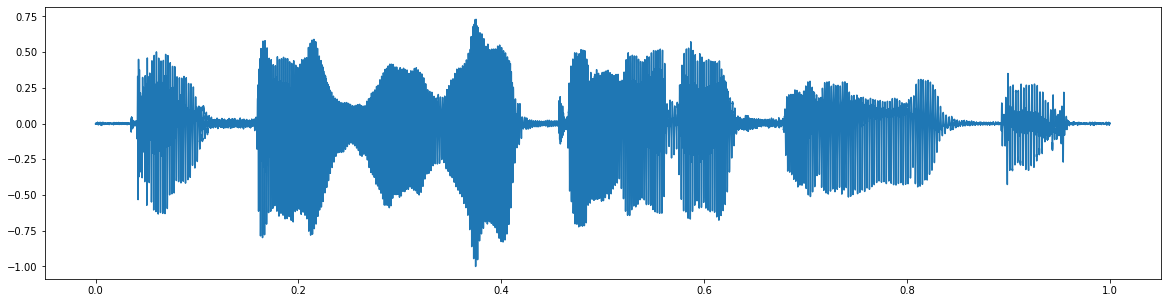

In [5]:
# plot audio

# generamos un vector de tiempos que relacione
# cada muesta con un tiempo en segundos
t = np.linspace(0, int(len(data)/sr), len(data))

plt.figure(figsize=(20,5))
plt.plot(t, data)
plt.show()

### Aplicar la funcion del máximo local

Variar el tamaño de la ventana y del hop, ¿en que casos se pierde más información?

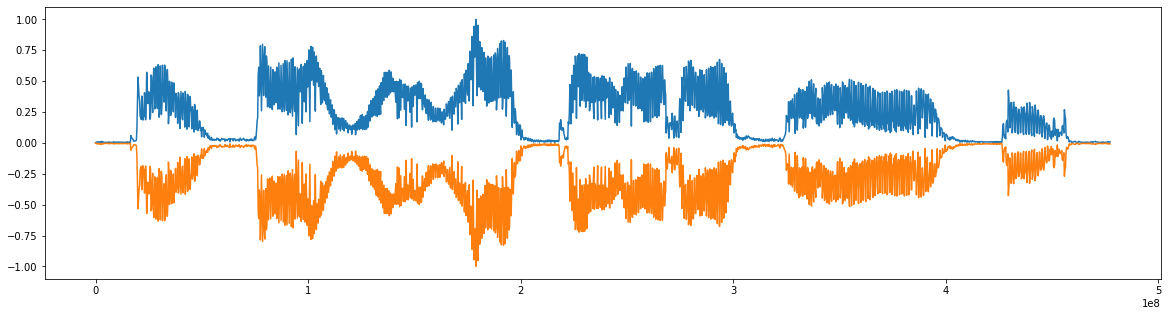

In [8]:
WINDOW_SIZE = 0.001
HOP_SIZE = 0.001

# calculate and plot
contour, t_contour = max_local(abs(data), sr, WINDOW_SIZE, HOP_SIZE)


plt.figure(figsize=(20,5))
plt.plot(t_contour, contour)
plt.plot(t_contour, -contour)
plt.show()

### Tiempo corto con ventanas
En la siguiente celda se muestra como generar una ventana de determinado tipo y largo. Pruebe los distintos tipos de ventana disponibles en scipy.signal (puede ver la lista completa en la documentacion).

E.g.: boxcar, triang, blackman, hamming, hann

Modifiquen la funcion de procesamiento en tiempo corto para que se pueda usar cualquier tipo de ventana.

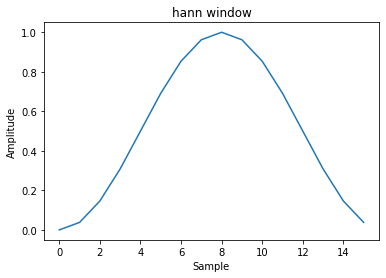

In [15]:
window_type = 'hann'

window = signal.windows.get_window(window_type, int(WINDOW_SIZE*sr))

plt.plot(window)

plt.title(window_type + " window")

plt.ylabel("Amplitude")

plt.xlabel("Sample")
plt.show()

### SINUSOIDE CON AMPLITUD DE SENAL

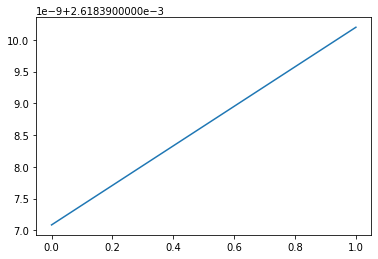

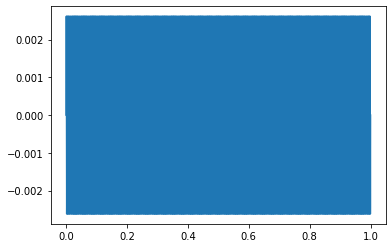

In [17]:
from scipy import interpolate

amp = 1
freq = 440

sin = amp * np.sin(2*np.pi * freq * t)

f = interpolate.interp1d(t_contour, contour)
interpolated_contour = f(t)


plt.plot(t, interpolated_contour)
plt.show()

mod_sin = sin * interpolated_contour

plt.plot(t, mod_sin)
plt.show()

ipd.Audio(mod_sin, rate=sr)